# SNS Scraping Lab

Social media is one of the major platforms that contain vast behavioural data, such as engagement level and sentiments of people. Combining this with other relevant data, such as company-related information, can bring about amazing insights helpful for companies and researchers of various fields. 

Twitter is a social media platform that allows users to microblog - to interact with each other and spread messages through short messages. Twitter is one of the most widely used social media platforms in the world, and users are often posting unfiltered opinions that are able to be retrieved easily. 

Twitter offers many information that is available for data scientists. Twitter provides functions to:

1. GET for retrieving data
2. POST for creating data
3. PUT for updating data
4. DELETE for removing data

However, for this lab guide, we will be taking a look at mainly the GET functions as it is the main function for getting Twitter data. 

There are 4 main types of data that we can acquire: 

1. Tweets
2. Entities (e.g. hashtags, media)
3. Places
4. Users

For this lab guide, we will be taking a look at acquiring the tweets, the trending hashtags, and the users and their tweets. 

* Tweets: also known as "status updates", these are the texts that users post. 
* Entities: contains metadata and additional contextual information about the tweets (e.g. hashtags, user mentions, links, polls, and attached media such as photos and videos)
* Users: contains the account metadata that describes a particular user of Twitter (e.g. number of followers, number of tweets posted)

In order to access these Twitter data, we need to use Twitter API. This allows users to gather tweets and related metadata. To use this API, users will have to create an app in the Twitter Developers page, acquire the relevant keys for safe access, and initialise the Twitter API modules to access Twitter data. For more detailed information with illustrations, please refer to the detailed lab guide provided. 

Due to the complexity of acquiring the keys, I have already acquired one that will solely be used for this lab guide purposes only. It is important that these authorisation keys are NOT TO BE SHARED with people outside of this class. For security reasons, the authorisation key will written on the notebook provided. 

### Installing Twitter package

We have to first install the Twitter package to use the Twitter API. 

In [1]:
!pip install twitter

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import twitter
import json

## Initialising Twitter API

To use Twitter API, we have to initialise it using the tokens and the authentication keys that has been provided. 

In [3]:
# Copy and paste the keys and tokens that you have acquired
CONSUMER_KEY = 'KSl5I1Ta970LrFRo70RZJS6RC'
CONSUMER_SECRET = 'pumBJu35LoqJBXpRPc2iJq1aPWQj7lz8FbXa4MOC9xGZgOmEZn'
OAUTH_TOKEN = '900198409-n8jwPPp0PG40IuGvICBggDIBBxlQMVR4DYJChoVm'
OAUTH_TOKEN_SECRET = 'IH4llnqkvlqAOCvPijK3ByAm2iOrP5WMq5LKgwhoQXX1n'

Twitter utilises OAuth, which acts as a key that grants the users access to private resources on a website (in this case, Twitter). Twitter API integrates with OAuth to create an authentication code that allows you to access the Twitter data. 

In the code below, we input the authentication codes into the OAuth function and pass that authentication key to the Twitter API through twitter.Twitter function. This is the initialisation step for Twitter API, which creates an object that contains the authenticated API.

In [4]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

The first priority of scraping from Twitter would be to **gather the tweets**. However, we have to first determine the criteria for the tweets to be gathered. Therefore, we can either gather tweets according to the trending topics or we can gather tweets according to a particular user. 

We will first take a look at the trending topics. 

## Trending Topics

One of the main features of Twitter is that it allows users to see what are the trending topics. These trending topics can be in the form of hashtags or simple keywords that are being said by a lot of users at a given time. The easiest way to look at the trending topics is through location. 

By using Twitter API's **trends.place** function, we can gather information regarding the trending topics in a particular place that we want to look at. For this example, we will take a look at the trending topics of the entire world and the USA. 

The locations are determined through Yahoo API's "Where on Earth ID", but as of this moment, it is extremely difficult to attain the IDs as there are numerous procedures. The IDs for the entire world and the USA are shown a lot in other tutorials and websites, and that is why we were able to attain them easily. 

* Entire world ID: 1
* USA ID: 23424977

In [5]:
WORLD_WOE_ID = 1      # where-on-earth id
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

When we print out the variable "world_trends" containing the trending topics of the world, we see a messy dict in a list type of data. Unfortunately, this is the common returned data type for many Twitter API functions. If we take a closer look, we can see that for key: **trends**, we can get the **name** of the trending topic, the **url** for searching the topic, and the **tweet_volume** that indicates the number of tweets that have mentioned this particular topic. At the bottom, **as_of** shows the time when this query has been made and the **locations** that specifies the location of the query made for trending topics. 

In [7]:
len(world_trends) # 즉, Entry가 하나 밖에 없음

1

In [6]:
print(world_trends)

[{'trends': [{'name': '#PortugueseGP', 'url': 'http://twitter.com/search?q=%23PortugueseGP', 'promoted_content': None, 'query': '%23PortugueseGP', 'tweet_volume': 117002}, {'name': '#GoodLuckSoldierChen', 'url': 'http://twitter.com/search?q=%23GoodLuckSoldierChen', 'promoted_content': None, 'query': '%23GoodLuckSoldierChen', 'tweet_volume': 301955}, {'name': '#우리의_인생모토_유타_생일축하해', 'url': 'http://twitter.com/search?q=%23%EC%9A%B0%EB%A6%AC%EC%9D%98_%EC%9D%B8%EC%83%9D%EB%AA%A8%ED%86%A0_%EC%9C%A0%ED%83%80_%EC%83%9D%EC%9D%BC%EC%B6%95%ED%95%98%ED%95%B4', 'promoted_content': None, 'query': '%23%EC%9A%B0%EB%A6%AC%EC%9D%98_%EC%9D%B8%EC%83%9D%EB%AA%A8%ED%86%A0_%EC%9C%A0%ED%83%80_%EC%83%9D%EC%9D%BC%EC%B6%95%ED%95%98%ED%95%B4', 'tweet_volume': 259195}, {'name': 'Hamilton', 'url': 'http://twitter.com/search?q=Hamilton', 'promoted_content': None, 'query': 'Hamilton', 'tweet_volume': 88364}, {'name': '#MOA가_발견한_TXT의_블루아워', 'url': 'http://twitter.com/search?q=%23MOA%EA%B0%80_%EB%B0%9C%EA%B2%AC%ED%95%9C

In [8]:
print(len(world_trends))
world_trends[0].keys() # dictinary의 key들

1


dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [13]:
json_normalize(world_trends[0])

,trends,as_of,created_at,locations
0,"[{'name': '#PortugueseGP', 'url': 'http://twit...",2020-10-25T15:23:05Z,2020-10-24T17:31:04Z,"[{'name': 'Worldwide', 'woeid': 1}]"


In [12]:
from pandas import json_normalize
json_normalize(world_trends[0], 'trends')

,name,url,promoted_content,query,tweet_volume
0,#PortugueseGP,http://twitter.com/search?q=%23PortugueseGP,None,%23PortugueseGP,117002.0
1,#GoodLuckSoldierChen,http://twitter.com/search?q=%23GoodLuckSoldier...,None,%23GoodLuckSoldierChen,301955.0
2,#우리의_인생모토_유타_생일축하해,http://twitter.com/search?q=%23%EC%9A%B0%EB%A6...,None,%23%EC%9A%B0%EB%A6%AC%EC%9D%98_%EC%9D%B8%EC%83...,259195.0
3,Hamilton,http://twitter.com/search?q=Hamilton,None,Hamilton,88364.0
4,#MOA가_발견한_TXT의_블루아워,http://twitter.com/search?q=%23MOA%EA%B0%80_%E...,None,%23MOA%EA%B0%80_%EB%B0%9C%EA%B2%AC%ED%95%9C_TX...,364875.0
5,#しねって書いて予測変換してみる,http://twitter.com/search?q=%23%E3%81%97%E3%81...,None,%23%E3%81%97%E3%81%AD%E3%81%A3%E3%81%A6%E6%9B%...,12958.0
6,Iwobi,http://twitter.com/search?q=Iwobi,None,Iwobi,NaN
7,Lewis,http://twitter.com/search?q=Lewis,None,Lewis,108133.0
8,Sainz,http://twitter.com/search?q=Sainz,None,Sainz,16913.0
9,石田さん,http://twitter.com/search?q=%E7%9F%B3%E7%94%B0...,None,%E7%9F%B3%E7%94%B0%E3%81%95%E3%82%93,28693.0


The same applies for trending topics in USA.

In [14]:
print(us_trends)

[{'trends': [{'name': 'Mark Meadows', 'url': 'http://twitter.com/search?q=%22Mark+Meadows%22', 'promoted_content': None, 'query': '%22Mark+Meadows%22', 'tweet_volume': 50963}, {'name': '#SundayMorning', 'url': 'http://twitter.com/search?q=%23SundayMorning', 'promoted_content': None, 'query': '%23SundayMorning', 'tweet_volume': 29509}, {'name': '#PortugueseGP', 'url': 'http://twitter.com/search?q=%23PortugueseGP', 'promoted_content': None, 'query': '%23PortugueseGP', 'tweet_volume': 116633}, {'name': '#AskFFT', 'url': 'http://twitter.com/search?q=%23AskFFT', 'promoted_content': None, 'query': '%23AskFFT', 'tweet_volume': None}, {'name': '#FFNow', 'url': 'http://twitter.com/search?q=%23FFNow', 'promoted_content': None, 'query': '%23FFNow', 'tweet_volume': None}, {'name': '#MOA가_발견한_TXT의_블루아워', 'url': 'http://twitter.com/search?q=%23MOA%EA%B0%80_%EB%B0%9C%EA%B2%AC%ED%95%9C_TXT%EC%9D%98_%EB%B8%94%EB%A3%A8%EC%95%84%EC%9B%8C', 'promoted_content': None, 'query': '%23MOA%EA%B0%80_%EB%B0%9C%EA%

For now, let us say that we are only interested in the trending topics. We can gather them simply through the method shown below: 

In [15]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#PortugueseGP
#GoodLuckSoldierChen
#우리의_인생모토_유타_생일축하해
Hamilton
#MOA가_발견한_TXT의_블루아워
#しねって書いて予測変換してみる
Iwobi
Lewis
Sainz
石田さん
chan
Mark Meadows
Albon
Suning
Lennon
東京BABYLON
公開中PV
Defoe
STAY GOLD ON AAA
Michael Schumacher
Ings
Godfrey
우리아빠
KILL ME ATTORNEY
Do you
TREASURE IS COMING BACK
ガスリー
CCAA
両面アクキー
#WalpurgisNightTracklist
#OurBlueHourStartsNow
#TheGiftedGraduationEP8
#YUTA
#estadoalarma
#SOUEVE
#Ögrtİhtiyacına60Bin
#F1naGlobo
#アニナナ
#SnowManありがとう
#PlebiscitoChile
#Dpcm
#極主夫道
#TokopediaxNCT
#見た人も謎ツイートしろ
#GPPortugal
#f1jp
#AprueboConMiLapizAzul
#湊友希那生誕祭2020
#HappyRikuDay
#Formula1


Here, we are simply iterating through the dict in list of world_trends, and printing the name of the trending topic. We can see that we were able to get only 20 trending topics through this query as Twitter only shows 20 trending topics at a time (Top 20 trending topics). 

The trending topics for USA are shown below:

In [16]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

Mark Meadows
#SundayMorning
#PortugueseGP
#AskFFT
#FFNow
#MOA가_발견한_TXT의_블루아워
RENEW INFINITY TRAIN
Santas
Iwobi
Peter Gunz
Nuns
Sainz
Minshew
Suning
Jamaal Williams
Bernard
Aaron Jones
Wilton Gregory
Sasha Obama
Justin Jackson
Gibson
Trafalgar
Go Philly
Mrs. Claus
Union Leader
Face the Nation
Verstappen
Packers -3
Full PPR
Stroll
sam reinhart
Tee Higgins
kcon
Boosie
Marc Short
Godfrey
Hamilton
石田さん
chan
Albon
東京BABYLON
Lennon
Defoe
公開中PV
TREASURE IS COMING BACK
STAY GOLD ON AAA
Michael Schumacher
Ings
우리아빠
Do you


## Querying Tweets

We have found the trending topics in Twitter for some specific time. However, the end goal is to gather the tweets and related data. By using the trending topics as queries we can gather the tweets that include the trending topics. Let's try to get tweets that contain the hashtag: #TuesdayThoughts using **search.tweets(q=' ', count= )**. This function takes in the query term at the argument "q", and takes in the number of tweets to gather in the argument "count". 

In [17]:
# 찾고자 하는 키워드 q에 넣음
searched = twitter_api.search.tweets(q='#TuesdayThoughts', count=100)

In [18]:
print(searched)

{'statuses': [{'created_at': 'Sun Oct 25 15:25:45 +0000 2020', 'id': 1320386072405180416, 'id_str': '1320386072405180416', 'text': 'RT @Vaani09362788: #TuesdayThoughts\n✨✨\nYour attitude is like a price tag, it shows  how valuable you are.... https://t.co/juB6RKRmBE', 'truncated': False, 'entities': {'hashtags': [{'text': 'TuesdayThoughts', 'indices': [19, 35]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Vaani09362788', 'name': 'Vamini', 'id': 1164466495184703493, 'id_str': '1164466495184703493', 'indices': [3, 17]}], 'urls': [], 'media': [{'id': 1315834525390237696, 'id_str': '1315834525390237696', 'indices': [109, 132], 'media_url': 'http://pbs.twimg.com/media/EkLIh30UcAABDbc.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EkLIh30UcAABDbc.jpg', 'url': 'https://t.co/juB6RKRmBE', 'display_url': 'pic.twitter.com/juB6RKRmBE', 'expanded_url': 'https://twitter.com/Vaani09362788/status/1315834528607342592/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resi

The result for the query returns a dictionary containing 2 keys:

In [20]:
searched.keys()

dict_keys(['statuses', 'search_metadata'])

In [21]:
print(len(searched['statuses']), len(searched['search_metadata']))

100 9


In [22]:
statuses_0th = searched['statuses'][0]
statuses_0th

{'created_at': 'Sun Oct 25 15:25:45 +0000 2020',
 'id': 1320386072405180416,
 'id_str': '1320386072405180416',
 'text': 'RT @Vaani09362788: #TuesdayThoughts\n✨✨\nYour attitude is like a price tag, it shows  how valuable you are.... https://t.co/juB6RKRmBE',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'TuesdayThoughts', 'indices': [19, 35]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Vaani09362788',
    'name': 'Vamini',
    'id': 1164466495184703493,
    'id_str': '1164466495184703493',
    'indices': [3, 17]}],
  'urls': [],
  'media': [{'id': 1315834525390237696,
    'id_str': '1315834525390237696',
    'indices': [109, 132],
    'media_url': 'http://pbs.twimg.com/media/EkLIh30UcAABDbc.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/EkLIh30UcAABDbc.jpg',
    'url': 'https://t.co/juB6RKRmBE',
    'display_url': 'pic.twitter.com/juB6RKRmBE',
    'expanded_url': 'https://twitter.com/Vaani09362788/status/1315834528607342592/photo/1',
    'type': 'photo'

In [23]:
statuses_0th.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [24]:
print(statuses_0th['text']) # 트위터 메세지
print(statuses_0th['favorite_count']) # 좋아요 개수
print(statuses_0th['retweet_count']) # 리트윗 된 개수

RT @Vaani09362788: #TuesdayThoughts
✨✨
Your attitude is like a price tag, it shows  how valuable you are.... https://t.co/juB6RKRmBE
0
4


In [25]:
statuses_0th['entities']   # name and hashtag can be seen here

{'hashtags': [{'text': 'TuesdayThoughts', 'indices': [19, 35]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'Vaani09362788',
   'name': 'Vamini',
   'id': 1164466495184703493,
   'id_str': '1164466495184703493',
   'indices': [3, 17]}],
 'urls': [],
 'media': [{'id': 1315834525390237696,
   'id_str': '1315834525390237696',
   'indices': [109, 132],
   'media_url': 'http://pbs.twimg.com/media/EkLIh30UcAABDbc.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/EkLIh30UcAABDbc.jpg',
   'url': 'https://t.co/juB6RKRmBE',
   'display_url': 'pic.twitter.com/juB6RKRmBE',
   'expanded_url': 'https://twitter.com/Vaani09362788/status/1315834528607342592/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 564, 'h': 686, 'resize': 'fit'},
    'medium': {'w': 564, 'h': 686, 'resize': 'fit'},
    'small': {'w': 559, 'h': 680, 'resize': 'fit'}},
   'source_status_id': 1315834528607342592,
   'source_status_id_str': '13158345286073

The 2 keys are "statuses" and "search_metadata". Statuses contain the actual tweets collected and the corresponding metadata. Search_metadata contains the information about the query itself, which is not that useful at the moment. We will mainly focus on the "statuses" key. 

We have to be aware of the data structure when navigating through the collected tweets. 

It seems that we have gathered 100 tweets. We have set the limit to 100 tweets, and 100 tweets were available at the time. 

In the key, "statuses" refers to the actual tweets and the corresponding metadata. For example, in each status, "text" section contains the actual tweet, "id" section contains the id number for that tweet, "entities" contains the entities for the particular tweet, such as hashtags. 

Now, let's try to extract 10 tweets among the tweets that we have gathered. Along with the actual tweets, let's try to also extract the **number of favourites**, and the **number of retweets**. 

Number of favourites refers to the number of times the tweet was favourited by another use. This is a feature of Twitter that allows users to "like" the tweet. 

Retweets refers to a user relaying the tweet to their Twitter profile, allowing their followers to see the particular tweet. 

We will first store all statuses in the "statuses" variable for easier iteration.

In [26]:
statuses = searched['statuses']

In [27]:
len(statuses)

100

Then, now, we will iterate through first 10 of these tweets gathered, and print the tweet, the number of favourites, and the number of retweets. 

In [28]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favourites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @Vaani09362788: #TuesdayThoughts
✨✨
Your attitude is like a price tag, it shows  how valuable you are.... https://t.co/juB6RKRmBE
Favourites:  0
Retweets:  4

RT @s_anurudh: Worshiped by those who know,
Those who don't know are wondering,
Those who are neglect are jealous,
Those who have experienc…
Favourites:  0
Retweets:  1

RT @smallbiztrends: "Success is liking yourself, liking what you do, and liking how you do it." - Maya Angelou #TuesdayThoughts #TuesdayMot…
Favourites:  0
Retweets:  22

RT @mvouchercodes1: Win a #Sony Bravia #Day21 of #Mvouchercodes

RT&amp;F for a chance to #win a Smart TV from
@mvouchercodes1

Visit https://t…
Favourites:  0
Retweets:  245

RT @Swati_S844321: आप नियमित तौर पर मेडिटेशन कर के खुश रह सकते हैं। मेडिटेशन आपके आत्मविश्वास को बढ़ाता है, और आपकी सब परेशानियां दूर हो जा…
Favourites:  0
Retweets:  12

RT @AlphaTutorsLTD: "The best way to destroy an enemy is to make him a friend."
 -Abraham Lincoln

#TuesdayThoughts #friends #inspire #writ…
Favourit

We can see from the above code that we can separate and extract the tweets and their corresponding metadata. So if necessary, we can store each of them as a separate variable and make them into features for later use. 

From the texts we have gathered, let's now try to extract the tweet, the user name of the one who tweeted, and the hashtags involved in the tweet.

In [29]:
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name']
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses
               for hashtag in status['entities']['hashtags']]

In [30]:
print(status_texts)

['RT @Vaani09362788: #TuesdayThoughts\n✨✨\nYour attitude is like a price tag, it shows  how valuable you are.... https://t.co/juB6RKRmBE', "RT @s_anurudh: Worshiped by those who know,\nThose who don't know are wondering,\nThose who are neglect are jealous,\nThose who have experienc…", 'RT @smallbiztrends: "Success is liking yourself, liking what you do, and liking how you do it." - Maya Angelou #TuesdayThoughts #TuesdayMot…', 'RT @mvouchercodes1: Win a #Sony Bravia #Day21 of #Mvouchercodes\n\nRT&amp;F for a chance to #win a Smart TV from\n@mvouchercodes1\n\nVisit https://t…', 'RT @Swati_S844321: आप नियमित तौर पर मेडिटेशन कर के खुश रह सकते हैं। मेडिटेशन आपके आत्मविश्वास को बढ़ाता है, और आपकी सब परेशानियां दूर हो जा…', 'RT @AlphaTutorsLTD: "The best way to destroy an enemy is to make him a friend."\n -Abraham Lincoln\n\n#TuesdayThoughts #friends #inspire #writ…', 'RT @Manju60161202: #TuesdayThoughts\nओम नाम काल का है  अधिक जानकारी के लिए देखिये साधना टीवी रात 7:30 बजे https://t.co/XBmfAc

In [31]:
print(screen_names)

['Vaani09362788', 's_anurudh', 'smallbiztrends', 'mvouchercodes1', 'mvouchercodes1', 'Swati_S844321', 'AlphaTutorsLTD', 'Manju60161202', 'Manju60161202', 'ghulamabbasshah', 'Sarojgabel', 'IshwantiR', 'SaintRampalJiM', 's_anurudh', 'JaydevSaha7', 'SaintRampalJiM', 'Sakshi01083602', 'Swati_S844321', 'Sakshi01083602', 'Sakshi01083602', 'Sakshi01083602', 'Being_Sunidhi', 'holybibletoday', 'Swati_S844321', 'Swati_S844321', 'Swati_S844321', '002Prena', 'LonePriyanka', 'LynzforCongress', 'Swati_S844321', 'RobinRoberts', 'Swati_S844321', 'DaleSRogers', 'Swati_S844321', 'Swati_S844321', 'johnpavlovitz', 'Being_Sunidhi', 'Being_Sunidhi', 'lordherbert007', 'xyzwtf_55', 'AshramGzb', 'asiaticpr', 'siomsz', 'IkeJoshua11', 'johnpavlovitz', 'GodloverGeetu', 'Lalitkumar2020', 'SaintRampalJiM', 'aishnaim', 'DiscipleOfMSG', 'Rani45384656', 'A_AMilne', 'jodyboots', 'AMErikaNGIRLLL', 'Deacon6353', 'A_AMilne', 'RahulSa59122933', 'RahulSa59122933', 'ER78613', 'miliman12photos', 'VisitVirginia', 'Davejohnson0

In [32]:
print(hashtags)

['TuesdayThoughts', 'TuesdayThoughts', 'Sony', 'Day21', 'Mvouchercodes', 'win', 'TuesdayThoughts', 'friends', 'inspire', 'TuesdayThoughts', 'TuesdayThoughts', 'Encounter', 'Indian', 'Zee', 'PakNavyDay', 'DefenceDay', 'OppositionWithIndiaOnFATF', 'GodMorningTuesday', 'TuesdayThoughts', 'GodMorningTuesday', 'TuesdayThoughts', 'GodMorningTuesday', 'Godmorningtuesday', 'TuesdayThoughts', 'GodMorningTuesday', 'TuesdayThoughts', 'TuesdayThoughts', 'HappyDussehra', 'Prayer', 'TuesdayThoughts', 'NavratriDay4', 'tuesdayvibes', 'TuesdayThoughts', 'Free', 'TuesdayThoughts', 'HappyDussehra', 'TuesdayThoughts', 'HappyDussehra', 'TuesdayThoughts', 'TuesdayThoughts', 'photooftheday', 'photo', 'PhotosOfMyLife', 'RaysUp', 'SundayMorning', 'SnowMan2D2D_day4', 'SundayThoughts', 'TuesdayThoughts', 'सनातन_धर्म', 'nidhimanral', 'mondaythoughts', 'TuesdayThoughts', 'quotes', 'talents', 'JosEndSarsProtest', 'ThisIsWhyWeProtest', 'EndSARS', 'EndPoliceBrutalityinNigeraNOW', 'EndSARSImmediately', 'TuesdayThought

Through this process alone, we can now proceed with extremely important and interesting analysis such as text vectorisation. We will explore such analysis later on. 

Let's now see how many tweets we have gathered. 

In [33]:
len(status_texts)

100

As expected, we have gathered 100 tweets. 

So far, we have gathered tweets that contained the trending topics. What if we want to collect tweets that contained different key words other than the trending topics? What if we wanted to see the tweets that contained the keyword: "COVID"? 

Easy, we can do this with the same procedure as how we gathered tweets with the trending topics. 

In [35]:
searched_2 = twitter_api.search.tweets(q='COVID', count=100)

In the variable "searched_2", we have gathered recent tweets that contain the keyword, "COVID". We can do the same procedure as above, gathering the tweets and their corresponding metadata for further analysis. 

In [36]:
# storing the tweets and their info into statuses_2 variable
statuses_2 = searched_2['statuses']

In [37]:
len(statuses_2)

100

We have gathered 100 tweets as expected. 

In [38]:
status_texts_2 = [status['text'] for status in statuses_2]

screen_names_2 = [user_mention['screen_name']
               for status in statuses_2
                   for user_mention in status['entities']['user_mentions']]

hashtags_2 = [hashtag['text'] for status in statuses_2
               for hashtag in status['entities']['hashtags']]

In [39]:
len(status_texts_2), len(screen_names_2), len(hashtags_2)

(100, 105, 19)

In [41]:
print(status_texts_2)
print()
print(screen_names_2)
print()
print(hashtags_2)

['Covid-19: los hallazgos de la CAM que Aguado emborrona con sus ocurrencias, por @diegodelacruz  https://t.co/okOipVpQFf vía @libertaddigital', 'RT @kylegriffin1: It seems that a second COVID outbreak is starting at the White House just a week and a half before Election Day.', '@Mike_Pence Free Covid for everyone. How does it feel to be the most hated administration in history? Go tuck yourself.', '@FaceTheNation @ScottGottliebMD Fundamental truth. Treacherous path ahead for the folk at risk. That said. If we ma… https://t.co/Uxihv1TTmd', 'RT @JustinGomezABC: Kamala Harris reacts to Pence keeping up his travel schedule despite his chief of staff &amp; 4 others testing positive for…', 'RT @MysterySolvent: Did I just hear that five of Mike Pence’s aides have tested positive for Covid-19, including his Chief Of Staff, and Pe…', '“Todos necesitamos un buen sistema sanitario y hay que pagar por ello. Espero que la covid extinga de una vez el mo… https://t.co/LAjfaVenEl', 'COMUNICADO RELATI

Now, we have gathered the tweets containing the terms "COVID", and we have extracted the tweets, their user names, and their hashtags. For the next section, to make the computations easier, we will focus only on the first 10 tweets gathered. 

In [42]:
status_10 = status_texts_2[:10]
len(status_10)

10

In [43]:
status_10

['Covid-19: los hallazgos de la CAM que Aguado emborrona con sus ocurrencias, por @diegodelacruz  https://t.co/okOipVpQFf vía @libertaddigital',
 'RT @kylegriffin1: It seems that a second COVID outbreak is starting at the White House just a week and a half before Election Day.',
 '@Mike_Pence Free Covid for everyone. How does it feel to be the most hated administration in history? Go tuck yourself.',
 '@FaceTheNation @ScottGottliebMD Fundamental truth. Treacherous path ahead for the folk at risk. That said. If we ma… https://t.co/Uxihv1TTmd',
 'RT @JustinGomezABC: Kamala Harris reacts to Pence keeping up his travel schedule despite his chief of staff &amp; 4 others testing positive for…',
 'RT @MysterySolvent: Did I just hear that five of Mike Pence’s aides have tested positive for Covid-19, including his Chief Of Staff, and Pe…',
 '“Todos necesitamos un buen sistema sanitario y hay que pagar por ello. Espero que la covid extinga de una vez el mo… https://t.co/LAjfaVenEl',
 'COMUNICADO

## Text Vectorisation

Since we have now gathered the tweets according to some query that we want, we can now perform text vectorisation methods to quantify the texts. The words in the text will be encoded as integers or floating point values for use as input. By quantifying the texts, we can make them into usable features for further analysis, such as machine learning usage. 

We will take a look at 2 common methods of vectorisation: Count Vectorisation and TF-IDF Vectorisation. 

### Count Vectorisation

Count vectorising refers to a method of tokenising a collection of text documents and building a vocabulary of known words while encoding new documents using that vocabulary built. 

The method of creation is as follows: 

1. Create an instance of the CountVectorizer class
2. Call the fit() function in order to learn a vocabulary from one or more documents
3. Call the transform() function on one or more documents as needed to encode each as a vector

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status_10)

print(vectorizer.get_feature_names())

['19', '1x6v82wkfl', 'actualización', 'administration', 'aguado', 'ahead', 'aides', 'amp', 'analiza', 'and', 'at', 'availability', 'be', 'before', 'bolivianos', 'buen', 'but', 'by', 'cam', 'chief', 'cnn', 'co', 'comunicado', 'con', 'coronavirus', 'cov2', 'covid', 'crisis', 'day', 'de', 'december', 'despite', 'did', 'diegodelacruz', 'does', 'early', 'effective', 'el', 'election', 'ello', 'emborrona', 'en', 'espero', 'este', 'everyone', 'experts', 'extinga', 'facethenation', 'feel', 'feriglesias', 'five', 'folk', 'for', 'free', 'fundamental', 'go', 'gobierno', 'half', 'hallazgos', 'harris', 'hated', 'have', 'hay', 'hear', 'his', 'history', 'house', 'how', 'https', 'if', 'in', 'including', 'is', 'it', 'just', 'justingomezabc', 'kamala', 'keeping', 'know', 'kylegriffin1', 'la', 'lajfavenel', 'libertaddigital', 'los', 'ma', 'mike', 'mike_pence', 'mo', 'most', 'mysterysolvent', 'necesitamos', 'ocurrencias', 'of', 'okoipvpqff', 'others', 'outbreak', 'pagar', 'para', 'path', 'país', 'pe', 'pen

The result shows the representing words that are included in all the tweets. We can transform this into an array to make this into numerical data. The numerical data simply shows how many times a certain word has appeared in each text (tweet). 

In [ ]:
# print(x.toarray())

- 0 refers to the word not being present in the text, and 1 refers to the word being present in the text. This data can now be used as a feature to be used as an input for machine learning or other analytical purposes. 

### TF-IDF Vectorizer

Using CountVectorizer is very simple but may be too simple for usage. For example, some words like "the" might appear many times and their counts may not be meaningful in the encoded vectors. Therefore, the more popular method of calculating word frequencies is TF-IDF (Term Frequency-Inverse Document Frequency) 

* Term frequency: summarises how often a given word appears within a document
* Inverse document frequency: downscales words that appear a lot across documents

Basically, TF-IDF are word frequency scores that try to highlight words that are more interesting. 

TfidfVectorizer will tokenise documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The flow of usage is basically the same as CountVectorizer. 

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenise and build vocab
vectorizer.fit(status_10)
vector = vectorizer.transform(status_10)

We can print out the learnt vocabulary as such:

In [47]:
print(vectorizer.vocabulary_)  # vocabularies
print()
print(vectorizer.idf_)         # idf values

{'covid': 26, '19': 0, 'los': 83, 'hallazgos': 58, 'de': 29, 'la': 80, 'cam': 18, 'que': 107, 'aguado': 4, 'emborrona': 40, 'con': 23, 'sus': 126, 'ocurrencias': 91, 'por': 102, 'diegodelacruz': 33, 'https': 68, 'co': 21, 'okoipvpqff': 93, 'vía': 145, 'libertaddigital': 82, 'rt': 111, 'kylegriffin1': 79, 'it': 73, 'seems': 119, 'that': 130, 'second': 118, 'outbreak': 95, 'is': 72, 'starting': 125, 'at': 10, 'the': 131, 'white': 149, 'house': 66, 'just': 74, 'week': 147, 'and': 9, 'half': 57, 'before': 13, 'election': 38, 'day': 28, 'mike_pence': 86, 'free': 53, 'for': 52, 'everyone': 44, 'how': 67, 'does': 34, 'feel': 48, 'to': 132, 'be': 12, 'most': 88, 'hated': 60, 'administration': 3, 'in': 70, 'history': 65, 'go': 55, 'tuck': 137, 'yourself': 153, 'facethenation': 47, 'scottgottliebmd': 117, 'fundamental': 54, 'truth': 136, 'treacherous': 135, 'path': 98, 'ahead': 5, 'folk': 51, 'risk': 110, 'said': 113, 'if': 69, 'we': 146, 'ma': 84, 'uxihv1ttmd': 141, 'justingomezabc': 75, 'kamal

The inverse document frequencies are printed above. We can now transform the entire document that we have prepared using TF-IDF method. 

In [48]:
print(vector.shape)

(10, 155)


In [154]:
# print(vector.toarray())

We get the TF-IDF score for each word that is normalised to values between 0 and 1. This encoded document vector can now be used directly as features for most of machine learning problems. 

## Word Cloud

We can also visualise the commonly appearing terms in the document. Using the latest 10 tweets that we have prepared, let us create a Word Cloud. 

In [49]:
# combine all strings in the list into one string
status_text = ', '.join(status_10)

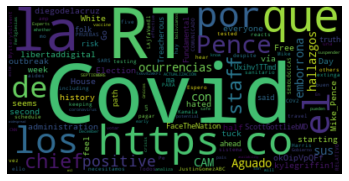

In [50]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

With bigger text document, we can get more interesting word clouds. You can explore more with bigger dataset on your own to gather more interesting insights. 

## Accessing User Information

So far, we have learnt how to find out the trending topics, how to use query terms to gather tweets, and how to use those tweets gathered to gain insights. There is another method of gathering tweets and useful information: accessing user information. 

By accessing user information, we can gain useful information such as:
   
1. Location
2. Follower count
3. Date of creation
4. Number of tweets

And many more. 

### Getting User Information

Using **users.lookup(screen_name= )**, we can access a user's information. In the argument "screen_name", we have to input the Twitter ID name that we want to access. The Twitter ID name is the name in the form of "@SocialWebMining", where the @ signifies that it is an ID. The output is a nested dictionary in a list, requiring careful navigation. 

As an example, let us try to access Elon Musk's Twitter account. Elon Musk's Twitter ID is @elonmusk. 

In [51]:
account = twitter_api.users.lookup(screen_name='elonmusk')

In [52]:
print(account)

[{'id': 44196397, 'id_str': '44196397', 'name': 'Elon Musk', 'screen_name': 'elonmusk', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 39528265, 'friends_count': 97, 'listed_count': 56573, 'created_at': 'Tue Jun 02 20:12:29 +0000 2009', 'favourites_count': 6959, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 12674, 'lang': None, 'status': {'created_at': 'Sun Oct 25 01:48:59 +0000 2020', 'id': 1320180525009571845, 'id_str': '1320180525009571845', 'text': '@engineers_feed Sigh … there should be a new supersonic jet, this time electric', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'engineers_feed', 'name': 'World of Engineering', 'id': 3429950987, 'id_str': '3429950987', 'indices': [0, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_r

We can now extract necessary information into variables of our choice. For example, let us extract the **name**, **description**, and **followers_count**. 

In [53]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [54]:
account_name = account[0]['name']

account_description = account[0]['description']

account_followers = account[0]['followers_count']

In [55]:
print(account_name)
print(account_description)
print(account_followers)

Elon Musk

39528265


Unfortunately for Elon Musk, there is no description available. However, using these methods, we can now create more features should we need these information. 

### Getting User's Tweets

Getting a user's information is good, but it would be much better to get the tweets of a user. Fortunately, the Twitter API provides such function: **statuses.user_timeline(screen_name= , count= )**

In [56]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='elonmusk', count=100)

In [57]:
print(user_tweets)

[{'created_at': 'Sun Oct 25 01:48:59 +0000 2020', 'id': 1320180525009571845, 'id_str': '1320180525009571845', 'text': '@engineers_feed Sigh … there should be a new supersonic jet, this time electric', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'engineers_feed', 'name': 'World of Engineering', 'id': 3429950987, 'id_str': '3429950987', 'indices': [0, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1320069546657648642, 'in_reply_to_status_id_str': '1320069546657648642', 'in_reply_to_user_id': 3429950987, 'in_reply_to_user_id_str': '3429950987', 'in_reply_to_screen_name': 'engineers_feed', 'user': {'id': 44196397, 'id_str': '44196397', 'name': 'Elon Musk', 'screen_name': 'elonmusk', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 39528290, 'friends_count': 97, 'li

In [58]:
len(user_tweets)

100

We have gathered latest 100 tweets of Elon Musk. In a list, there are 100 dictionaries, each dictionary containing the tweet and its corresponding information. We can do similar methods to extract the necessary information. We will now try to extract 10 tweets of Elon Musk. 

We will first try to navigate through the data structure and print out the latest 10 tweets. 

In [59]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


@engineers_feed Sigh … there should be a new supersonic jet, this time electric

@WorldAndScience Critical to humanity’s future

Congratulations SpaceX Team! https://t.co/nO1Z98a94f

@TesLatino Mine is a few days ahead

@EliBurton_ @teslaownersSV Sure, it could be an option in settings

@teslaownersSV Visualization will tone down significantly for production. These are intentionally strident colors.

@Erdayastronaut @tobyliiiiiiiiii @austinbarnard45 @SuperclusterHQ Sure

@Erdayastronaut @tobyliiiiiiiiii @austinbarnard45 @SuperclusterHQ I’m in Boca every week, so maybe we could talk th… https://t.co/Vb4WD40bsC

@tobyliiiiiiiiii @austinbarnard45 @SuperclusterHQ Good point. Probably next week in form of a written piece on SpaceX website.

@austinbarnard45 @SuperclusterHQ Great pics! That we now have the beginnings of a Starship production system is most meaningful.


Now, we will save all of Elon Musk's tweets into a variable since we know now how to navigate through the data structure. 

In [60]:
user_texts = [status['text'] for status in user_tweets]

In [61]:
len(user_texts)

100

We will use only 10 tweets, same as before, for computational ease. 

In [69]:
user_10 = user_texts[:]
len(user_10)

100

In [240]:
# user_10

### Vectoriser with User Tweets

Same as before, we can try vectorising Elon Musk's tweets using Count Vectoriser, TF-IDF Vectoriser, and visualising through Word Cloud. 

#### Count Vectoriser

In [70]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_10)
print(vectorizer.get_feature_names())

['0ct2svangy', '15', '1st', '1xhs2awxb9', '20', '210', '21st', '28delayslater', '2k', '2vcoaxsrv3', '2z5mrscc4g', '30', '300', '360', '3r0owmreup', '420', '4qrymb7ii0', '50', '69', '7c0v16wt6y', '90', '9cbjmeaavw', '9qxyxmmiuj', 'able', 'accurate', 'achieve', 'actually', 'added', 'after', 'agreed', 'ahead', 'all', 'allow', 'almost', 'also', 'amp', 'an', 'analysis', 'antenna', 'antonkanerva', 'any', 'appears', 'applies', 'appreciate', 'approve', 'are', 'around', 'array', 'as', 'astrojordy', 'at', 'austinbarnard45', 'autodelete', 'automatically', 'baby', 'back', 'bad_at_life', 'bamtheteslaman1', 'bar', 'bart_sanders', 'basically', 'bay', 'be', 'been', 'before', 'beginnings', 'beijing', 'best', 'beta', 'better', 'bevs', 'billgates', 'bobdylan', 'boca', 'boringcompany', 'buff', 'bugs', 'but', 'by', 'c5', 'c6', 'camera', 'can', 'caranddriver', 'cargo', 'carry', 'cars', 'cautious', 'ceiling', 'chamber', 'change', 'changes', 'charltonbrooker', 'chipro', 'chotihaque', 'churchill', 'cinotpyrc',

In [64]:
print(x.toarray())

[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0

#### TF-IDF Vectoriser

In [71]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_10)

print(vectorizer.vocabulary_)

{'engineers_feed': 167, 'sigh': 451, 'there': 525, 'should': 449, 'be': 62, 'new': 344, 'supersonic': 489, 'jet': 266, 'this': 528, 'time': 535, 'electric': 161, 'worldandscience': 597, 'critical': 121, 'to': 538, 'humanity': 243, 'future': 204, 'congratulations': 111, 'spacex': 470, 'team': 503, 'https': 242, 'co': 101, 'no1z98a94f': 349, 'teslatino': 514, 'mine': 314, 'is': 258, 'few': 183, 'days': 126, 'ahead': 30, 'eliburton_': 163, 'teslaownerssv': 511, 'sure': 491, 'it': 261, 'could': 118, 'an': 36, 'option': 361, 'in': 251, 'settings': 446, 'visualization': 579, 'will': 593, 'tone': 542, 'down': 153, 'significantly': 452, 'for': 193, 'production': 395, 'these': 526, 'are': 45, 'intentionally': 256, 'strident': 485, 'colors': 104, 'erdayastronaut': 170, 'tobyliiiiiiiiii': 540, 'austinbarnard45': 51, 'superclusterhq': 488, 'boca': 73, 'every': 174, 'week': 585, 'so': 461, 'maybe': 306, 'we': 582, 'talk': 499, 'th': 518, 'vb4wd40bsc': 574, 'good': 214, 'point': 383, 'probably': 391

In [66]:
vector = vectorizer.transform([user_10[0]])

In [177]:
print(vector.shape)

(1, 105)


#### Word Cloud

In [72]:
user_combined = ', '.join(user_10)

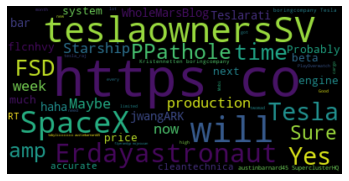

In [73]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion

Therefore, now we have taken a look at some simplistic methods in exploring Twitter and gathering tweets. There are many more complex and advanced methods that can be used that requires more programming and API understanding and expertise. 

# Homework Exercise
- Gather Twitter data regarding a topic of your own interest and perform the same exploration as the guide.
- Gather tweets of 5 Twitter users and perform the same exploration as the guide.

In [ ]:
# 주제에 관해서 같은 과정을 거치기! -> 주식
# 유명 트위터 유저 5명! 
# 트럼프, 버락 오바마, 빌 게이츠, 달라이 라마, 베르나르 베르베르